In [1]:
import numpy as np
import pandas as pd
import os
import sys
from google.colab import drive
import matplotlib.pyplot as plt
import math
import itertools

import random
import seaborn as sns

In [2]:
#mount google colab
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


Topic:
What does the musician(artists) social network look like?
- Firstly, how will we measure individual artists' influence? We use followers number in
the data set (influence_data)
- Then, we calculate and average the influence of each song of individual artists, and
incorporate the song influence with the followers number together as the general
influence of artists

In [3]:
df_inf = pd.read_csv('/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/influence_data.csv')
df_full= pd.read_csv('/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/full_music_data.csv')

In [4]:
df_full['artists_id'] = df_full['artists_id'].apply(lambda x: x.replace('[','').replace(']',''))
df_full['artist_names'] = df_full['artist_names'].apply(lambda x: x.replace('[','').replace(']',''))
df_full['artist_names'] = df_full['artist_names'].apply(lambda x: x.replace('"',''))
df_full['artist_names'] = df_full['artist_names'].apply(lambda x: x.replace("'",""))
#df_full['artists_id'] = df_full['artists_id'].apply(lambda x: x.replace(', ',''))

#remove brackets from the column 
df_full['artists_id'] = df_full['artists_id'].astype(str)

In [5]:
df_full['artists_id']

0        178301
1        178301
2        178301
3        625201
4        625201
          ...  
98335    690254
98336    690254
98337    690254
98338    690254
98339    690254
Name: artists_id, Length: 98340, dtype: object

In [6]:
df_full['length'] = df_full.artists_id.str.len()
df_full = df_full[df_full.length <= 7]

In [7]:
df_full['artists_id'].value_counts()

26350      874
79016      684
792507     677
119107     610
66915      539
          ... 
250798       1
91651        1
678459       1
361973       1
3513172      1
Name: artists_id, Length: 5549, dtype: int64

In [8]:
df_full['artists_id'] = df_full['artists_id'].astype(int)

In [9]:
#remove brackets from the column 
df_full['artist_names'].value_counts()


Wolfgang Amadeus Mozart    874
Billie Holiday             684
Frank Sinatra              677
Vladimir Horowitz          610
Bob Dylan                  539
                          ... 
Marion Meadows               1
Tomahawk                     1
The Hondells                 1
NDea Davenport               1
Livingston Taylor            1
Name: artist_names, Length: 5549, dtype: int64

In [10]:
df_inf['followers_count'] = df_inf.groupby('influencer_id').influencer_id.transform('count')
df_inf

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start,followers_count
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980,12
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990,12
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990,389
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990,64
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990,9
...,...,...,...,...,...,...,...,...,...
42765,580300,Sufjan Stevens,Pop/Rock,1990,3661738,Rosemary & Garlic,Pop/Rock,2010,3
42766,261309,Vybz Kartel,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010,1
42767,467203,Michael Jackson,R&B;,1960,3670556,Trinidad Cardona,R&B;,2010,101
42768,2518003,Popcaan,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010,1


In [11]:
"""df_inf.to_csv('df_inf.csv')
!cp df_inf.csv '/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/'"""

"df_inf.to_csv('df_inf.csv')\n!cp df_inf.csv '/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/'"

In [12]:
df_full['song_inf'] = df_full.groupby(['artists_id','song_title (censored)'])['popularity'].transform('mean') 
df_full['song_inf_avg'] = df_full.groupby(['artists_id'])['song_inf'].transform('mean') 

In [13]:
df_full

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),length,song_inf,song_inf_avg
0,Fat Freddys Drop,178301,0.600,0.365,0.131,130.046,-13.083,0,9,0.06720,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie,6,54.0,54.000000
1,Fat Freddys Drop,178301,0.874,0.326,0.179,119.620,-13.302,0,11,0.01360,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,6,53.0,54.000000
2,Fat Freddys Drop,178301,0.670,0.531,0.336,139.385,-8.267,0,9,0.01560,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,6,55.0,54.000000
3,Alexander ONeal,625201,0.761,0.702,0.850,104.773,-8.523,1,7,0.10800,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,6,34.0,39.600000
4,Alexander ONeal,625201,0.661,0.828,0.902,115.078,-12.673,0,11,0.27600,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,6,37.0,39.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98335,ZZ Top,690254,0.276,0.892,0.715,80.475,-7.035,1,11,0.40900,0.000000,0.7140,0.0893,0,115973,33,1975,4/18/1975,Jailhouse Rock - **** Remaster,6,33.0,39.766355
98336,ZZ Top,690254,0.700,0.592,0.906,109.847,-10.434,1,11,0.10800,0.018400,0.1180,0.0681,0,263627,32,1976,11/29/1976,It's Only Love,6,32.0,39.766355
98337,ZZ Top,690254,0.709,0.709,0.863,111.544,-12.023,1,2,0.11800,0.000011,0.1250,0.0370,0,158400,31,1987,1987,Balinese,6,31.0,39.766355
98338,ZZ Top,690254,0.552,0.651,0.533,161.548,-10.624,0,4,0.00494,0.034900,0.1320,0.2290,0,232533,43,1992,4/13/1992,La Grange - **** Remaster,6,58.0,39.766355


In [14]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93930 entries, 0 to 98339
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   artist_names           93930 non-null  object 
 1   artists_id             93930 non-null  int64  
 2   danceability           93930 non-null  float64
 3   energy                 93930 non-null  float64
 4   valence                93930 non-null  float64
 5   tempo                  93930 non-null  float64
 6   loudness               93930 non-null  float64
 7   mode                   93930 non-null  int64  
 8   key                    93930 non-null  int64  
 9   acousticness           93930 non-null  float64
 10  instrumentalness       93930 non-null  float64
 11  liveness               93930 non-null  float64
 12  speechiness            93930 non-null  float64
 13  explicit               93930 non-null  int64  
 14  duration_ms            93930 non-null  int64  
 15  po

In [15]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42770 entries, 0 to 42769
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   influencer_id            42770 non-null  int64 
 1   influencer_name          42770 non-null  object
 2   influencer_main_genre    42770 non-null  object
 3   influencer_active_start  42770 non-null  int64 
 4   follower_id              42770 non-null  int64 
 5   follower_name            42770 non-null  object
 6   follower_main_genre      42770 non-null  object
 7   follower_active_start    42770 non-null  int64 
 8   followers_count          42770 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.9+ MB


In [16]:
df_inf.rename(columns = {'influencer_id':'artists_id','influencer_name':'artist_names'}, inplace = True)

In [17]:
df_inf['artists_id'] = df_inf['artists_id'].astype(int)

In [18]:
A = df_inf['artists_id']
B = df_full['artists_id']
len(list(set(A) & set(B)))

3600

In [19]:
df_inf['artist_names'].value_counts()

The Beatles              615
Bob Dylan                389
The Rolling Stones       319
David Bowie              238
Led Zeppelin             221
                        ... 
Russ Taff                  1
Luis Alberto Spinetta      1
DÃ¢m-Funk                  1
Blue Mitchell              1
Colosseum                  1
Name: artist_names, Length: 3761, dtype: int64

In [20]:
df_full_m = df_full[['song_inf_avg','artist_names','artists_id']]
df_inf_m = df_inf[['followers_count','artist_names','artists_id']]

In [21]:
df_full_m

,song_inf_avg,artist_names,artists_id
0,54.000000,Fat Freddys Drop,178301
1,54.000000,Fat Freddys Drop,178301
2,54.000000,Fat Freddys Drop,178301
3,39.600000,Alexander ONeal,625201
4,39.600000,Alexander ONeal,625201
...,...,...,...
98335,39.766355,ZZ Top,690254
98336,39.766355,ZZ Top,690254
98337,39.766355,ZZ Top,690254
98338,39.766355,ZZ Top,690254


In [22]:
df_inf_m

,followers_count,artist_names,artists_id
0,12,The Exploited,759491
1,12,Tricky,25462
2,389,Bob Dylan,66915
3,64,Leonard Cohen,71209
4,9,The Gun Club,91438
...,...,...,...
42765,3,Sufjan Stevens,580300
42766,1,Vybz Kartel,261309
42767,101,Michael Jackson,467203
42768,1,Popcaan,2518003


In [23]:
df_j = pd.merge(df_inf_m,df_full_m, how='inner',on=['artists_id']).drop_duplicates()
df_j

,followers_count,artist_names_x,artists_id,song_inf_avg,artist_names_y
0,12,The Exploited,759491,31.714286,The Exploited
84,12,Tricky,25462,46.666667,Tricky
156,389,Bob Dylan,66915,30.849722,Bob Dylan
209827,64,Leonard Cohen,71209,41.835616,Leonard Cohen
214499,9,The Gun Club,91438,30.833333,The Gun Club
...,...,...,...,...,...
3216147,1,Thom Yorke,588887,52.666667,Thom Yorke
3216150,1,King Krule,2814183,51.750000,King Krule
3216154,1,Vybz Kartel,261309,62.000000,Vybz Kartel
3216155,1,Popcaan,2518003,54.000000,Popcaan


In [24]:
"""df_j.to_csv('df_j.csv')
!cp df_j.csv '/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/'"""

"df_j.to_csv('df_j.csv')\n!cp df_j.csv '/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/'"

In [25]:
df_j['total_influence'] = df_j['followers_count'] + df_j['song_inf_avg'] 

In [26]:
df_infc = df_j[['artists_id','total_influence']]
df_infc

,artists_id,total_influence
0,759491,43.714286
84,25462,58.666667
156,66915,419.849722
209827,71209,105.835616
214499,91438,39.833333
...,...,...
3216147,588887,53.666667
3216150,2814183,52.750000
3216154,261309,63.000000
3216155,2518003,55.000000


# Using that, we can calculate influence by implementing a breadth-first search algorithm (BFS) and rank artists based on score.

In [27]:
df_inf

,artists_id,artist_names,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start,followers_count
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980,12
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990,12
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990,389
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990,64
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990,9
...,...,...,...,...,...,...,...,...,...
42765,580300,Sufjan Stevens,Pop/Rock,1990,3661738,Rosemary & Garlic,Pop/Rock,2010,3
42766,261309,Vybz Kartel,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010,1
42767,467203,Michael Jackson,R&B;,1960,3670556,Trinidad Cardona,R&B;,2010,101
42768,2518003,Popcaan,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010,1


In [28]:
df_inf['follower_name'] = df_inf['follower_name'].astype(str)
df_inf['artist_names'] = df_inf['artist_names'].astype(str)

In [29]:
data= df_inf.groupby('artist_names')['follower_name'].apply(lambda x: x.tolist()).to_dict()
#Out[8]: {89989: [32598, 3085083], 95281: [3085083]}
data

{"'Til Tuesday": ['Gossip',
  'The Cardigans',
  'Beth Orton',
  'The Postal Service'],
 '*NSYNC': ["Colby O'Donis",
  'Girls Aloud',
  'Jonas Brothers',
  'Dream',
  'Jesse McCartney',
  'Aaron Carter',
  'The Lonely Island',
  'One Direction',
  'Sports'],
 '10,000 Maniacs': ['Sixpence None the Richer',
  'The Innocence Mission',
  'The Corrs',
  'Ivy',
  'Dido',
  'Joss Stone',
  'Lisa Loeb',
  'Jewel',
  'The Cardigans',
  'The Cranberries',
  'Veruca Salt',
  'Sarah McLachlan',
  'KT Tunstall',
  'Alanis Morissette'],
 '10cc': ['Sherbet',
  'Amy Grant',
  'The Beautiful South',
  'The Blue Nile',
  'City Boy',
  'Pulp',
  'Julian Cope',
  'Jellyfish',
  'Oingo Boingo',
  'Of Montreal',
  'They Might Be Giants',
  'XTC',
  'Squeeze',
  'Peter Gabriel',
  'The Art of Noise'],
 '112': ['Chris Brown',
  'Pretty Ricky',
  'Lloyd',
  'Day26',
  'Cupid',
  'Adrian Marcel',
  'Bando Jonez'],
 '1910 Fruitgum Company': ['Teenage Fanclub',
  'Ramones',
  'Britney Spears',
  'Tiffany',
  'Han

In [30]:
graph1 = df_inf.groupby('artist_names')['follower_name'].apply(lambda x: x.tolist()).to_dict()

In [31]:
from queue import Queue
visited = {}
level = {}
parent = {}
traversal_output = []
queue = Queue()

In [32]:
for node in graph1.keys():
        visited[node] = False
        parent[node] = None
        level[node] = -1

In [33]:
s = "Eric Dolphy"
visited[s] = True
level[s] = 0
queue.put(s)

In [35]:
while not queue.empty():
    u = queue.get()
    traversal_output.append(u)
    for v in graph1[u]:
        if not visited[v]:
            visited[v] = True
            parent[v] = u
            level[v] = level[u] + 1
            queue.put(v)
            
print(traversal_output)
print(visited)
print(level)
print(parent)

['Eric Dolphy']
{"'Til Tuesday": False, '*NSYNC': False, '10,000 Maniacs': False, '10cc': False, '112': False, '1910 Fruitgum Company': False, '20/20': False, '3 Doors Down': False, '311': False, '4 Non Blondes': False, '54-40': False, '7 Seconds': False, '808 State': False, '999': False, '? & the Mysterians': False, 'A Certain Ratio': False, 'A Flock of Seagulls': False, 'A Guy Called Gerald': False, 'A Perfect Circle': False, 'A*Teens': False, 'A.C. Reed': False, 'A.R. Kane': False, 'ABBA': False, 'ABC': False, 'AC/DC': False, 'AFI': False, 'ATB': False, 'Aaliyah': False, 'Aaron Carter': False, 'Aaron Neville': False, 'Aaron Tippin': False, 'Abbey Lincoln': False, 'Accept': False, 'Ace': False, 'Ace Frehley': False, 'Ace of Base': False, 'Acker Bilk': False, 'Adam Ant': False, 'Adam Sandler': False, 'Adamski': False, 'Adele': False, 'Adina Howard': False, 'Admiral Bailey': False, 'Adolescents': False, 'Adriano Celentano': False, 'Aerosmith': False, 'Agent Orange': False, 'Agnostic Fr

https://towardsdatascience.com/introduction-to-graph-algorithm-breadth-first-search-algorithm-in-python-8644b6d31880 


In [36]:
# mencari jalur diantara 2 titik dalam grafik menggunakan BFS
def bfs_algo(graph, start, goal):
    # validasi dan hentikan program ketika 
    # tujuan awal sama dengan tujuan akhir
    if start == goal: 
        return "Tidak dapat melanjutkan, Tujuan anda sama dengan posisi anda saat ini!"
    # variabel kosong untuk melacak 
    # titik yang sudah pernah dikunjungi
    visited = []
    # variabel yang berisikan data titik awal
    # untuk melacak semua jalur yang akan diperiksa
    queue = [[start]]
    # terus melakukan perulangan sampai 
    # semua jalur yang memungkinkan telah diperiksa 
    while queue:
        # hapus jalur pertama dari antrian dan,
        # dapatkan titik terakhir dari jalur
        path = queue.pop(0)
        node = path[-1]
        # validasi apakah jalur terakhir dari antrian
        # sudah pernah dikunjungi sebelumnya
        if node not in visited:
            neighbours = graph[node]
            # Telusuri semua titik dari grafik yang belum dikunjungi,  
            # buat jalur baru dan masukkan dalam antrian 
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                # tampilkan jalur antara titik awal hingga akhir
                # ketika titik saat ini adalah tujuan akhir
                if neighbour == goal:
                    return new_path
            # tandai titik sudah dikunjungi
            visited.append(node)
    # hentikan program ketika jalur (awal, akhir) yang diberikan 
    # tidak terdaftar didalam daftar sambungan
    return "Jalur tidak ditemukan, pastikan memasukkan data dengan tepat sesuai daftar"

https://github.com/bakode/bfs_algo/blob/master/search_algorithm_bfs.ipynb

In [37]:
graph_edges = {
    'Yogyakarta': ['Bantul','GunungKidul', 'Wates', 'Magelang', 'Klaten'],
    'Wates': ['Bantul','Yogyakarta','Magelang','Purworejo','Wonosobo'],
    'Bantul': ['Wates', 'Yogyakarta', 'GunungKidul'],
    'GunungKidul': ['Bantul','Yogyakarta','Klaten','Pacitan'],
    'Klaten': ['Salatiga','Yogyakarta','GunungKidul','Solo'],
    'Magelang': ['Wonosobo','Yogyakarta','Wates','Semarang','Salatiga'],
    'Pacitan': ['GunungKidul','Solo'],
    'Purworejo': ['Wates','Wonosobo'],
    'Wonosobo': ['Wates','Magelang'],
    'Semarang': ['Salatiga','Magelang'],
    'Salatiga': ['Magelang','Klaten','Solo'],
    'Solo': ['Salatiga','Klaten','Pacitan'],
}

In [38]:
bfs_algo(graph_edges, "Yogyakarta", "Salatiga")

['Yogyakarta', 'Magelang', 'Salatiga']

https://github.com/tsengchan/GraphAlgoBFS/blob/master/GraphBFSalgo.ipynb 

https://github.com/TAJWAR99/Python_Algorithms/blob/main/bfs_Algo.ipynb

https://github.com/TAJWAR99/Python_Algorithms/blob/main/bfs_Algo.ipynb

In [39]:
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = [] # List for visited nodes.
queue = []     #Initialize a queue

def bfs(visited, graph, node): #function for BFS
  visited.append(node)
  queue.append(node)

  while queue:          # Creating loop to visit each node
    m = queue.pop(0) 
    print (m, end = " ") 

    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

# Driver Code
print("Following is the Breadth-First Search")
bfs(visited, graph_edges, 'Wates')    # function calling

Following is the Breadth-First Search
Wates Bantul Yogyakarta Magelang Purworejo Wonosobo GunungKidul Klaten Semarang Salatiga Pacitan Solo 

https://github.com/tsengchan/GraphAlgoBFS/blob/master/GraphBFSalgo.ipynb

In [40]:
from collections import deque
import networkx as nx
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt


inf = float('inf')

attrs1 = {'V':{'color': 'white', 'distance': inf,'parent': 'nothing'},
         'R': {'color': 'white', 'distance': inf,'parent': 'nothing'},
         'S': {'color': 'white', 'distance': inf,'parent': 'nothing'},
         'W': {'color': 'white', 'distance': inf,'parent': 'nothing'},
         'T': {'color': 'white', 'distance': inf,'parent': 'nothing'},
         'X': {'color': 'white', 'distance': inf,'parent': 'nothing'},
         'U': {'color': 'white', 'distance': inf,'parent': 'nothing'},
         'Y': {'color': 'white', 'distance': inf,'parent': 'nothing'}        
        }

G1 = nx.Graph(graph1)

nx.set_node_attributes(G1,attrs1)





def breadth(graph,start):

    graph.nodes[start]['color']='gray'
    graph.nodes[start]['distance']=0
    graph.nodes[start]['parent']=None

    enqueue = deque(start)
    while enqueue: 
        u = enqueue.pop()
        print("u: %s" %u)
        
        
        for index,v in enumerate(nx.all_neighbors(graph,u)):

            print("v: %s" %v)
            if graph.nodes[v]['color']=='white':
                
                graph.nodes[v]['color']='gray'
                graph.nodes[v]['distance']=graph.nodes[u]['distance']+1
                print("node %s color %s" %(v,graph.nodes[v]['color']) ) 


                enqueue.appendleft(v)
                

           
            
            graph.nodes[u]['color']='black'
            print("stop")
                

    
    return graph


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


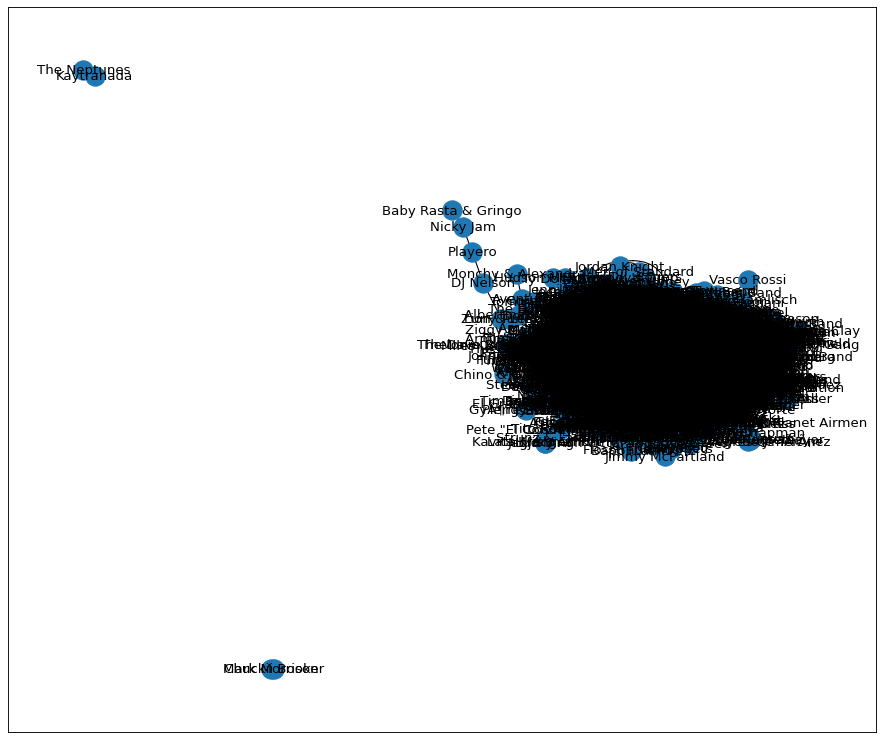

In [41]:
figure(num=None, figsize=(14, 12), dpi=80, facecolor='w', edgecolor='k')
nx.draw_networkx(G1)

plt.savefig("GraphBFS.png")

https://github.com/chatmethar-comp/searchBFS_DFS

In [ ]:
visited = []
queue = []
def bfs(visited, graph, node):
  visited.append(node)
  queue.append(node)
  while queue:
    s = queue.pop(0)
    # print(s,end="\n")
    for neighbour in graph[s]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
        print('neighbour :',neighbour)
        print('visited:',visited)
    print('neighbour queue:',queue)

bfs(visited, data, 'Erasure')



In [45]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import math



def deleteDuplicatedElementFromList(list):
    list.sort();
    length = len(list)
    lastItem = list[length - 1]
    for i in range(length - 2,-1,-1):
        currentItem = list[i]
        if currentItem == lastItem:
            list.remove(currentItem)
        else:
            lastItem = currentItem
    return list

In [46]:
allList = []
for key in data.keys():
    allList.append(key)
for value in data.values():
    for i in value:
        allList.append(i)
allList = deleteDuplicatedElementFromList(allList)

G = nx.DiGraph()
for artist in allList:
    G.add_node(artist)

In [ ]:
allList

In [50]:
df2 = pd.DataFrame(columns = ['Influencer', 'Follower', 'PA'])

for i in data.keys():
    try:
        i_follow = len(data[i])
    except KeyError:
        i_follow = 0

    for influence_i in data[i]:
        try:
            influence_i_fellow = len(data[influence_i])
        except KeyError:
            influence_i_fellow = 0

        df2 = df2.append({'Influencer': influence_i, 'Follower': i, 'PA': i_follow * influence_i_fellow}, ignore_index = True)
        print(influence_i, i, i_follow * influence_i_fellow)

df2 = df2.sort_values(by = ['PA'], ascending = False)

Streaming output truncated to the last 5000 lines.
SinÃ©ad O'Connor The Pogues 221
The Decemberists The Pogues 0
Dropkick Murphys The Pogues 68
Jawbreaker The Pogues 442
The Saw Doctors The Pogues 0
TLC The Pointer Sisters 370
Paula Abdul The Pointer Sisters 90
Kelis The Pointer Sisters 50
Jody Watley The Pointer Sisters 120
En Vogue The Pointer Sisters 220
Janet Jackson The Pointer Sisters 590
Destiny's Child The Pointer Sisters 160
Mary J. Blige The Pointer Sisters 340
SWV The Pointer Sisters 100
Mya The Pointer Sisters 0
Skindred The Police 0
Switchfoot The Police 153
The Living End The Police 0
Culture Club The Police 561
Crowded House The Police 714
Dispatch The Police 0
Fine Young Cannibals The Police 0
Geggy Tah The Police 102
Jars of Clay The Police 204
Umphrey's McGee The Police 0
Hombres G The Police 0
Hot Hot Heat The Police 51
Bloc Party The Police 0
Walk the Moon The Police 0
Live The Police 816
Maroon 5 The Police 255
No Doubt The Police 510
Pinback The Police 102
Primus 

In [54]:
df2

,Influencer,Follower,PA
4244,The Beatles,Bob Dylan,239235
34681,David Bowie,The Beatles,146370
34454,Led Zeppelin,The Beatles,135915
4309,The Rolling Stones,Bob Dylan,124091
34591,Jimi Hendrix,The Beatles,123615
...,...,...,...
14617,Atreyu,Hatebreed,0
14616,The Black Dahlia Murder,Hatebreed,0
32629,Michael Wycoff,Stevie Wonder,0
32631,Marlena Shaw,Stevie Wonder,0


In [ ]:
for influencer in data.keys():

  followers = data[influencer]
  for theFollower in followers:

    for i in range(len(df2)):


      if df2.at[i,'Influencer'] == influencer and df2.at[i, 'Follower'] == theFollower:


        theWeight = df2.at[i, 'PA']
        print(theWeight+1)
        G.add_edge(influencer, theFollower, weight = math.log(theWeight+1))

print(nx.info(G))

In [ ]:
theDict = nx.algorithms.centrality.betweenness_centrality(G)
df = pd.DataFrame.from_dict(data, orient = 'index', columns = ['Betweenness'])
df = df.sort_values(by = ['Betweenness'], ascending = False)
print(df.head(40))


In [ ]:
G.edges(data = True)